In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA PREPROCESSING

save all the csv files for each year in dictionary.

In [14]:
data_holder = {}
min_year = 2002
max_year = 2020

for year in range(min_year, max_year+1):
    data_holder['data_'+str(year)] = pd.read_csv(f'weather_of_{year}.csv')

len(data_holder)

19

shows all the NA values for each csv file.

In [15]:
na_values_holder = {}

for x,y in zip(data_holder.keys(),data_holder.values()):
    na_values_holder[x] = y.isna().any(axis=1).sum()

na_values_holder


{'data_2002': 18,
 'data_2003': 20,
 'data_2004': 17,
 'data_2005': 9,
 'data_2006': 17,
 'data_2007': 7,
 'data_2008': 15,
 'data_2009': 15,
 'data_2010': 9,
 'data_2011': 16,
 'data_2012': 17,
 'data_2013': 16,
 'data_2014': 6,
 'data_2015': 7,
 'data_2016': 11,
 'data_2017': 3,
 'data_2018': 10,
 'data_2019': 8,
 'data_2020': 13}

tried to fill NA values which are in 'Pct Avg to Date', but I could not figure out how to calculate for this column and it turns out that there are only few rows that are missing this column so I decided to drop these rows that consist NA values in 'Pct Avg to Date' column

In [16]:
for x in data_holder.values():
    x.dropna(inplace=True)

In [17]:
na_values_holder = {}

for x,y in zip(data_holder.keys(),data_holder.values()):
    na_values_holder[x] = y.isna().any(axis=1).sum()

na_values_holder

{'data_2002': 0,
 'data_2003': 0,
 'data_2004': 0,
 'data_2005': 0,
 'data_2006': 0,
 'data_2007': 0,
 'data_2008': 0,
 'data_2009': 0,
 'data_2010': 0,
 'data_2011': 0,
 'data_2012': 0,
 'data_2013': 0,
 'data_2014': 0,
 'data_2015': 0,
 'data_2016': 0,
 'data_2017': 0,
 'data_2018': 0,
 'data_2019': 0,
 'data_2020': 0}

VISUALIZATION OF MONTHLY WATER PRECIPITATION FROM 2002 TO 2019

In [18]:
init_df = data_holder.get('data_2002').iloc[:,:14]
temp = init_df
temp.columns = ['ID', 'LOCATION', 'OCT2002', 'NOV2002', 'DEC2002', 'JAN2002', 'FEB2002', 'MAR2002', 'APR2002', 'MAY2002', 'JUN2002', 'JUL2002', 'AUG2002', 'SEP2002']

year = 2002
for df in data_holder:
    if df == 'data_2002':
        continue
    else:
        temp = temp.merge(data_holder.get(df).iloc[:,:14], how='inner', on=['ID',"LOCATION"], suffixes=(None, f'{year+1}'))
        year += 1
temp.head()

,ID,LOCATION,OCT2002,NOV2002,DEC2002,JAN2002,FEB2002,MAR2002,APR2002,MAY2002,...,DEC2020,JAN2020,FEB2020,MAR2020,APR2020,MAY2020,JUN2020,JUL2020,AUG2020,SEP2020
0,LEMO3,LEMOLO LAKE,5.13,10.30,12.72,11.48,4.99,6.32,5.49,1.14,...,5.59,18.19,4.34,4.32,3.37,4.05,2.52,0.0,0.02,2.33
1,MFR,MEDFORD,0.19,4.16,4.34,1.59,1.65,1.33,1.49,0.53,...,2.86,3.43,0.51,0.74,0.46,2.50,1.20,0.0,0.00,0.05
2,RIDO3,RIDDLE,1.02,6.84,6.71,4.81,2.76,1.71,1.23,1.30,...,4.20,7.34,1.35,1.74,1.34,2.16,0.81,0.0,0.00,0.72
3,TKFO3,TOKETEE FALLS,3.23,7.45,9.59,6.94,3.54,4.06,3.31,1.22,...,3.55,10.37,3.16,4.31,2.39,4.26,2.41,0.0,0.01,1.54
4,WINO3,WINCHESTER DAM,1.66,7.37,7.39,5.32,2.77,2.93,1.46,1.29,...,4.14,8.24,1.60,2.63,1.69,2.75,1.33,0.0,0.00,1.10


out of over 300 locations, there were only 34 locations where precipitation over 19 years was recorded. However, I thought it would be enough data since it has around 230 datasets to show the severity of drought these days.

VISUALIZATION OF THE AMOUNT OF TOTAL WATER PRECIPITATION OF CERTAIN LOCATION

<AxesSubplot:>

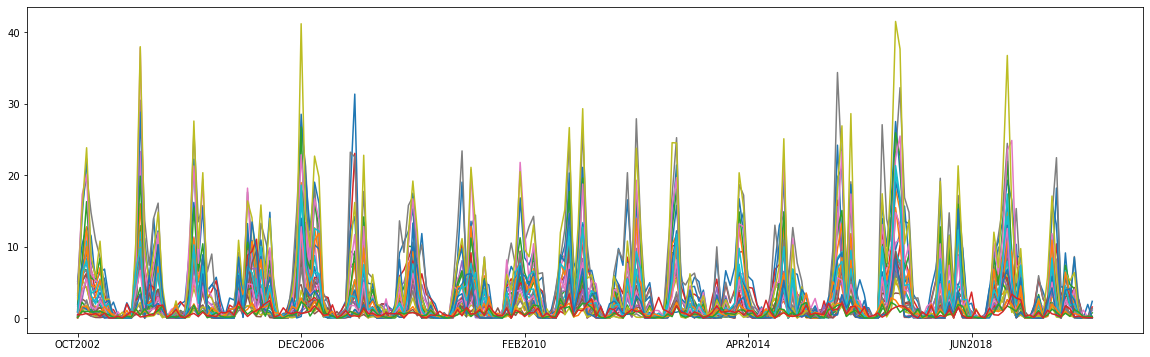

In [94]:
c_temp = temp
dc_temp = c_temp.drop(['ID'], axis=1)
tdc_temp = dc_temp.T
tdc_temp.columns = dc_temp['LOCATION']
final_df = tdc_temp.drop(['LOCATION'], axis=0)
final_df.plot(legend=None, figsize=(20,6))

tried to show the precipitation of the whole locations(the locations that were recorded consistently from year of 2002 to 2019), but this graph does not show the severity of drought enough since there is a difference of precipitation depending on which area the location is located. Therefore, I decided to illustrate graph dividing into certain locations such as (southern oregon coastal, oregon closed basins, northern california coastal, upper klamath, lower klamath, russian/napa/san francisco bay, sacramento/yuba/feather/american etc), and illustrate the change of yearly (total)precipitation between 2002 and 2019.

These areas were already divided in the website in the first place. However, I thought drought was a huge problem among everywhere in US, but now I think it was wrong.

<AxesSubplot:>

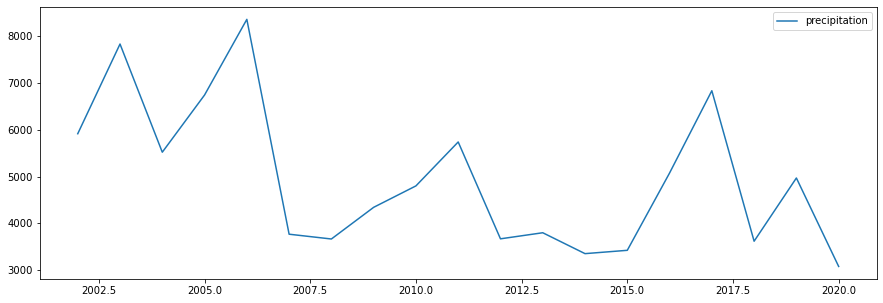

In [135]:
total_precip = {}
for year in range(min_year, max_year+1):
    total_precip[year] = [data_holder.get(f'data_{year}')['WY Total'].sum()]

total_precip
t_df = pd.DataFrame(data=total_precip)
total_df = t_df.rename(index={0:'precipitation'})
total_df.T.plot(figsize=(15,5))